In [3]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import io      
import matplotlib.pyplot as plt
import seaborn as sns


resource_url = 'https://books.toscrape.com/'
response = requests.get(resource_url, timeout=5)
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
contenedores_libros = soup.find_all('article', class_='product_pod')  
len(contenedores_libros)

20

In [5]:
datos_libros = []
for libro in contenedores_libros:
    titulo = libro.select_one('a[title]')['title'].strip()    
    precio = libro.select_one('p.price_color').text.strip()   
    disponibilidad = libro.select_one('p.instock.availability').text.strip()
    datos_libros.append({
        'Titulo': titulo[:20],
        'Precio': precio[2:],
        'Disponibilidad': disponibilidad
    })

df_libros = pd.DataFrame(datos_libros)
df_libros

,Titulo,Precio,Disponibilidad
0,A Light in the Attic,51.77,In stock
1,Tipping the Velvet,53.74,In stock
2,Soumission,50.10,In stock
3,Sharp Objects,47.82,In stock
4,Sapiens: A Brief His,54.23,In stock
5,The Requiem Red,22.65,In stock
6,The Dirty Little Sec,33.34,In stock
7,The Coming Woman: A,17.93,In stock
8,The Boys in the Boat,22.60,In stock
9,The Black Maria,52.15,In stock


In [6]:
#Limpiar dataframe
df_libros['Precio'] = (
    df_libros['Precio']
    .astype(str)
    .str.replace('£', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df_libros['Precio'] = pd.to_numeric(df_libros['Precio'], errors='coerce') 
df_libros.dropna(subset=['Precio'], inplace=True)

In [7]:
#BASE DE DATOS
DB_NAME = 'catalogo_libros.db'
TABLE_NAME = 'libros'

conn = sqlite3.connect(DB_NAME)  
    #.to_sql() hace un commit implícito
df_libros.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)
    
conn.commit() #Commit opcional pero buena práctica

df_verificacion = pd.read_sql("SELECT * FROM libros LIMIT 5", conn)
    
print(df_verificacion)
conn.close()

                 Titulo  Precio Disponibilidad
0  A Light in the Attic   51.77       In stock
1    Tipping the Velvet   53.74       In stock
2            Soumission   50.10       In stock
3         Sharp Objects   47.82       In stock
4  Sapiens: A Brief His   54.23       In stock


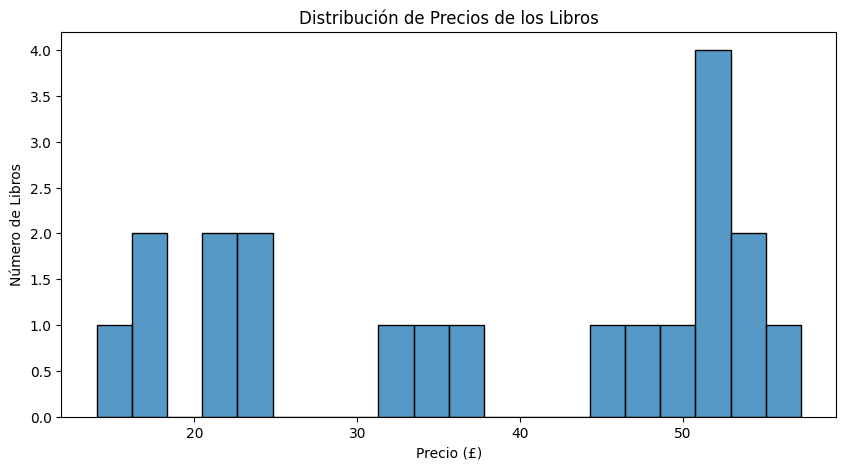

In [ ]:
#VISUALIZACIÓN

plt.figure(figsize=(10, 5))
sns.histplot(df_libros['Precio'], bins=20)
plt.title('Distribución de Precios de los Libros')
plt.xlabel('Precio (£)')
plt.ylabel('Número de Libros')
plt.show()

> Se puede observar como el precio de la mayoría de libros ronda los 50£, mientras que también hay un variedad de libros que se posicionan con precios asequibles.

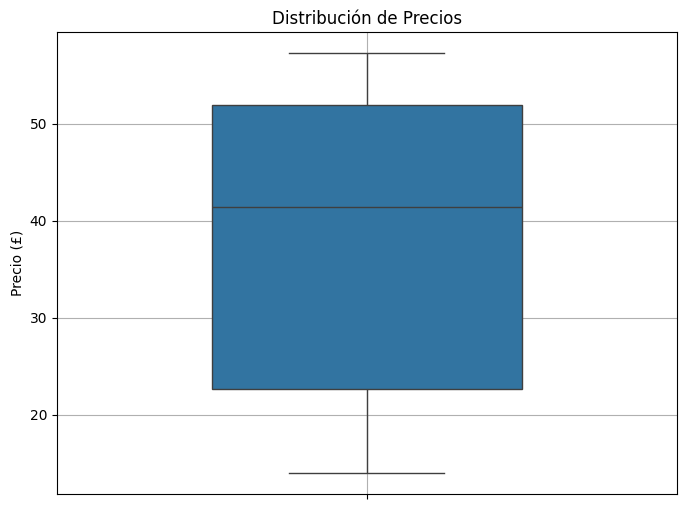

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    y=df_libros['Precio'],
    width=0.5
)
plt.title('Distribución de Precios')
plt.ylabel('Precio (£)')
plt.grid()
plt.show()

In [10]:
# sns.scatterplot(x='Precio', y=#?, data=df_libros)
# plt.title('Gráfico de Dispersión de Iris')
# plt.show()